In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models,backend
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data=pd.read_csv("mnist_train.csv")
test_data=pd.read_csv("mnist_test.csv")

In [3]:
train_data.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [4]:
xtrain=train_data.drop(['label'],axis=1).values
xtest=test_data.drop(['label'],axis=1).values

In [5]:
ytrain = train_data['label'].values
ytest=test_data['label'].values

In [6]:
xtrain.shape

(60000, 784)

In [7]:
xtrain,xtest= xtrain/255.0,xtest/255.0

In [8]:
print("ytrain shape:", xtrain.shape)
print("ytest shape:", xtest.shape)


ytrain shape: (60000, 784)
ytest shape: (10000, 784)


In [9]:
ytrain=to_categorical(ytrain,10)
ytest=to_categorical(ytest,10)

In [10]:
# xtrain,xtest= xtrain/255.0,xtest/255.0
print("ytrain shape:", ytrain.shape)
print("ytest shape:", ytest.shape)


ytrain shape: (60000, 10)
ytest shape: (10000, 10)


In [11]:
ytrain = ytrain.reshape(60000,10)

In [12]:
model=models.Sequential(
    [
        Flatten(input_shape=(784,)),
        Dense(128,activation='relu'),
        Dense(64,activation='relu'),
        Dense(32,activation='relu'),
        Dense(10,activation='softmax')
    ]

)

In [13]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
r=model.fit(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6968 - loss: 1.1050 - val_accuracy: 0.9076 - val_loss: 0.3197
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 934us/step - accuracy: 0.9171 - loss: 0.2968 - val_accuracy: 0.9325 - val_loss: 0.2349
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - accuracy: 0.9366 - loss: 0.2222 - val_accuracy: 0.9436 - val_loss: 0.1943
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 937us/step - accuracy: 0.9465 - loss: 0.1854 - val_accuracy: 0.9516 - val_loss: 0.1729
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 937us/step - accuracy: 0.9518 - loss: 0.1618 - val_accuracy: 0.9587 - val_loss: 0.1442


In [15]:
lss,acc=model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.9521 - loss: 0.1652


In [16]:
lss

0.14419372379779816

In [17]:
acc

0.9587000012397766

In [19]:
r.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

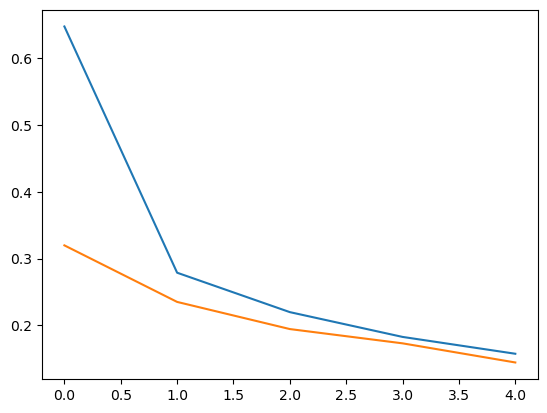

In [18]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.show()

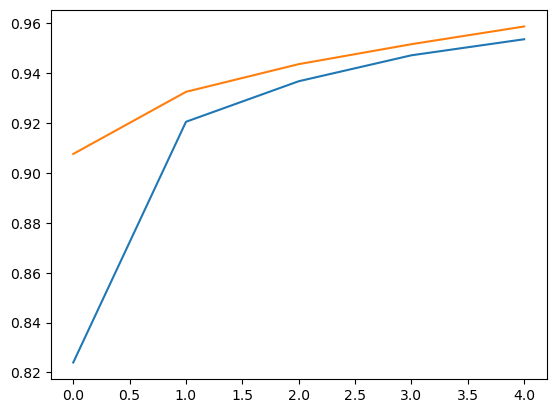

In [20]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.show()